# PHP 1880 Stress Survey

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Clean and Reverse Code

In [2]:
survey = pd.read_csv('survey.csv',  header=[1])

In [3]:
survey.drop('end.comments', axis=1, inplace=True)

In [4]:
survey.dropna(inplace=True)

In [5]:
# PSS Reverse Score Items 4, 5, 6, 7, 9, 10, 13

pss_reverse = ['PS1_4', 'PS1_5', 'PS1_6', 'PS1_7', 'PS1_9', 'PS1_10', 'PS1_13']

survey[pss_reverse] = survey[pss_reverse].replace({0:4, 1:3, 2:2, 3:1, 4:0})

In [6]:
# FFMQ Reverse Score Items 3, 5, 8, 10, 12, 13, 14, 16, 17, 18, 22, 23, 25, 28, 30, 34, 35, 38, 39

ffmq_reverse = ['FF1_3', 'FF1_5', 'FF1_8', 'FF1_10', 'FF1_12', 'FF1_13', 'FF1_14','FF1_16', 'FF1_17', 'FF1_18', 
                'FF1_22', 'FF1_23','FF1_25', 'FF1_28', 'FF1_30', 'FF1_34', 'FF1_35','FF1_38', 'FF1_39']


survey[ffmq_reverse] = survey[ffmq_reverse].replace({1:5, 2:4, 3:3, 4:2, 5:1})

In [7]:
pss_filter = [col for col in survey if col.startswith('PS1')]
ffmq_filter = [col for col in survey if col.startswith('FF1')]

### Split Pre/Post Survey and Run Analysis

In [8]:
pre = survey.loc[survey.timepoint == 'pre']
post = survey.loc[survey.timepoint == 'post']

In [9]:
pre = pre.loc[pre.email.isin(post.email)]
post = post.loc[post.email.isin(pre.email)]

In [10]:
pre['PSS Total'] = pre[pss_filter].sum(axis=1)

post['PSS Total'] = post[pss_filter].sum(axis=1)

In [11]:
pre['FFMQ Total'] = pre[ffmq_filter].sum(axis=1)

post['FFMQ Total'] = post[ffmq_filter].sum(axis=1)

In [12]:
ffmq_observing = {'FF1_1', 'FF1_6', 'FF1_11', 'FF1_15', 'FF1_20', 'FF1_26', 'FF1_31', 'FF1_36'}

ffmq_describing = {'FF1_2', 'FF1_7', 'FF1_12', 'FF1_16', 'FF1_22', 'FF1_27', 'FF1_32', 'FF1_37'}

ffmq_acting = {'FF1_5', 'FF1_8', 'FF1_13', 'FF1_18', 'FF1_23', 'FF1_28', 'FF1_34', 'FF1_38'}

ffmq_nonjudging = {'FF1_3', 'FF1_10', 'FF1_14', 'FF1_17', 'FF1_25', 'FF1_30', 'FF1_35', 'FF1_39'}

ffmq_nonreactivity = {'FF1_4', 'FF1_9', 'FF1_19', 'FF1_21', 'FF1_24', 'FF1_29', 'FF1_33'}

pre['FFMQ Total Observing'] = pre[ffmq_observing].sum(axis=1)
pre['FFMQ Total Describing'] = pre[ffmq_describing].sum(axis=1)
pre['FFMQ Total Acting'] = pre[ffmq_acting].sum(axis=1)
pre['FFMQ Total Nonjudging'] = pre[ffmq_nonjudging].sum(axis=1)
pre['FFMQ Total Nonreactivity'] = pre[ffmq_nonreactivity].sum(axis=1)

post['FFMQ Total Observing'] = post[ffmq_observing].sum(axis=1)
post['FFMQ Total Describing'] = post[ffmq_describing].sum(axis=1)
post['FFMQ Total Acting'] = post[ffmq_acting].sum(axis=1)
post['FFMQ Total Nonjudging'] = post[ffmq_nonjudging].sum(axis=1)
post['FFMQ Total Nonreactivity'] = post[ffmq_nonreactivity].sum(axis=1)

In [13]:
#PSS T Test

stats.ttest_rel(pre['PSS Total'], post['PSS Total'])

Ttest_relResult(statistic=2.832513401646404, pvalue=0.009974077194643686)

In [14]:
#PSS Pre Descriptive

pre['PSS Total'].describe()

count    22.000000
mean     28.863636
std       8.385336
min      10.000000
25%      24.250000
50%      27.500000
75%      34.750000
max      44.000000
Name: PSS Total, dtype: float64

In [15]:
#PSS Post Descriptive

post['PSS Total'].describe()

count    22.000000
mean     23.045455
std       5.205101
min      14.000000
25%      19.250000
50%      23.000000
75%      25.750000
max      34.000000
Name: PSS Total, dtype: float64

In [16]:
#FFMQ T Test

stats.ttest_rel(pre['FFMQ Total'], post['FFMQ Total'])

Ttest_relResult(statistic=-4.026430005773696, pvalue=0.0006099521139241871)

In [17]:
#FFMQ Pre Descriptive

pre['FFMQ Total'].describe()

count     22.000000
mean     114.681818
std       16.904174
min       86.000000
25%      101.000000
50%      114.500000
75%      127.750000
max      147.000000
Name: FFMQ Total, dtype: float64

In [18]:
#FFMQ Post Descriptive

post['FFMQ Total'].describe()

count     22.000000
mean     134.272727
std       13.884496
min      109.000000
25%      124.500000
50%      132.500000
75%      141.750000
max      160.000000
Name: FFMQ Total, dtype: float64

In [19]:
#FFMQ T Test Observing

stats.ttest_rel(pre['FFMQ Total Observing'], post['FFMQ Total Observing'])

Ttest_relResult(statistic=-2.704714417157594, pvalue=0.013270406420299639)

In [20]:
#FFMQ T Test Describing

stats.ttest_rel(pre['FFMQ Total Describing'], post['FFMQ Total Describing'])

Ttest_relResult(statistic=-0.6985271528789799, pvalue=0.49251144856484474)

In [21]:
#FFMQ T Test Acting

stats.ttest_rel(pre['FFMQ Total Acting'], post['FFMQ Total Acting'])

Ttest_relResult(statistic=-2.7739964106708253, pvalue=0.011372889865165723)

In [22]:
#FFMQ T Test Nonjudging

stats.ttest_rel(pre['FFMQ Total Nonjudging'], post['FFMQ Total Nonjudging'])

Ttest_relResult(statistic=-3.2034031615089122, pvalue=0.004269665180433506)

In [23]:
#FFMQ T Test Nonreactivity

stats.ttest_rel(pre['FFMQ Total Nonreactivity'], post['FFMQ Total Nonreactivity'])

Ttest_relResult(statistic=-3.8422377200889613, pvalue=0.0009467579585310732)

In [24]:
pre.NPS_1 = pre.NPS_1.round()
post.NPS_1 = post.NPS_1.round()

In [25]:
nsp_dict = {
    range(9,11) : 'Promoters',
    range(0,7) : 'Detractors'
}

In [26]:
nps_pre_defined = pre.replace({'NPS_1': nsp_dict})
nps_post_defined = post.replace({'NPS_1': nsp_dict})

In [27]:
#NPS Pre Test

((nps_pre_defined.NPS_1.str.count('Promoter').sum()/nps_post_defined.NPS_1.count())*100) - ((nps_pre_defined.NPS_1.str.count('Detractor').sum()/nps_post_defined.NPS_1.count())*100)

-4.545454545454543

In [28]:
#NPS Post Test

((nps_post_defined.NPS_1.str.count('Promoter').sum()/nps_post_defined.NPS_1.count())*100) - ((nps_post_defined.NPS_1.str.count('Detractor').sum()/nps_post_defined.NPS_1.count())*100)

45.45454545454546

In [29]:
#NPS Pre Values

nps_pre_defined['NPS_1'].value_counts()

8.0           9
Detractors    6
Promoters     5
7.0           2
Name: NPS_1, dtype: int64

In [30]:
#NPS Post Values

nps_post_defined['NPS_1'].value_counts()

Promoters     13
8.0            5
Detractors     3
7.0            1
Name: NPS_1, dtype: int64

In [31]:
total = pre.append(post, ignore_index=True)

In [32]:
pss_total = pd.melt(total, id_vars='timepoint', value_vars= 'PSS Total')

In [33]:
pss_total_grouped = pss_total.groupby('timepoint', sort=False).mean().reset_index()

In [34]:
pss_total_grouped

,timepoint,value
0,pre,28.863636
1,post,23.045455


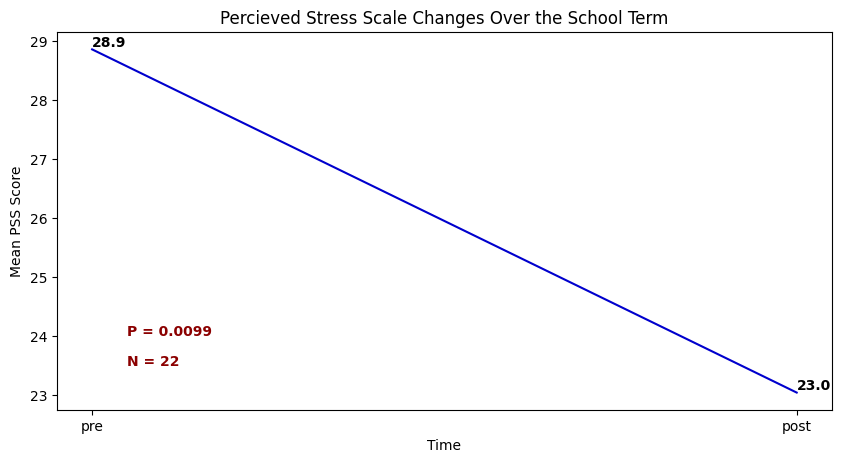

In [41]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.lineplot(
    data=pss_total_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean PSS Score")
ax.set(title= "Percieved Stress Scale Changes Over the School Term")


for x, y in zip(pss_total_grouped['timepoint'], pss_total_grouped['value']):
    plt.text(x = x, y = y+0.05, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 24, "P = 0.0099", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 23.5, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

In [36]:
ffmq_total = pd.melt(total, id_vars='timepoint', value_vars= 'FFMQ Total')

In [37]:
ffmq_total_grouped = ffmq_total.groupby('timepoint', sort=False).mean().reset_index()

In [38]:
ffmq_total_grouped

,timepoint,value
0,pre,114.681818
1,post,134.272727


/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_13578/2183973816.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Baseline 2021'), Text(1, 0, 'Follow-Up 2021')]

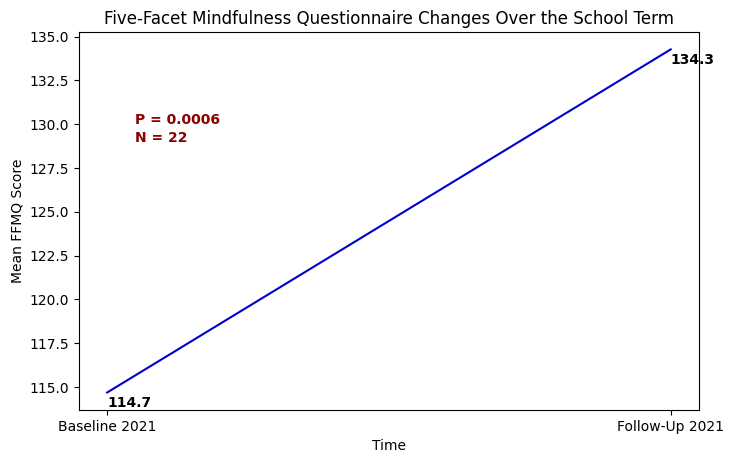

In [44]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

sns.lineplot(
    data=ffmq_total_grouped,
    x="timepoint",
    y="value",
    ci=None,
    color='mediumblue'
    )
ax.set(xlabel = "Time", ylabel = "Mean FFMQ Score")
ax.set(title= "Five-Facet Mindfulness Questionnaire Changes Over the School Term")


for x, y in zip(ffmq_total_grouped['timepoint'], ffmq_total_grouped['value']):
    plt.text(x = x, y = y-0.8, s = '{:.1f}'.format(y), color = 'black', weight='semibold') #.set_backgroundcolor('lightblue')

plt.text(1-0.95, 130, "P = 0.0006", horizontalalignment='left', size='medium', color='darkred', weight='semibold')
plt.text(1-0.95, 129, "N = 22", horizontalalignment='left', size='medium', color='darkred', weight='semibold')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Baseline 2021'
labels[1] = 'Follow-Up 2021'

ax.set_xticklabels(labels)